<div style="font-size: 14pt;">Prof. Krzysztof Rybinski</div><br/><br/>
<div style="font-size: 22pt;"><b>Artificial Intelligence course</b></div><br/><br/>
<div style="font-size: 18pt;">Homework 2</div><br/>
<div style="font-size: 18pt;">Answer the questions</div><br/><br/>
<div style="font-size: 18pt;">Q1. Why people are leaving this company?</div><br/>
<div style="font-size: 18pt;">Q2. What is the optimal threshold?</div><br/><br/>
<div style="font-size: 18pt;">Follow the instructions in this JN</div><br/>

In [523]:
#load necessary packages
import os
import pandas as pd
import statsmodels.api as sm
import statsmodels.graphics.api as smg
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns

In [524]:
#check current folder
os.getcwd()

'/Users/nindaba/Documents/vistula/semister-5/ai/work/02'

In [525]:
#load and inspect HR data
hr = pd.read_csv("HR_comma_sep.csv")
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [526]:
#understand the data format
hr.iloc[:,0:4].describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours
count,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337
std,0.248631,0.171169,1.232592,49.943099
min,0.090000,0.360000,2.000000,96.000000
25%,0.440000,0.560000,3.000000,156.000000
50%,0.640000,0.720000,4.000000,200.000000
75%,0.820000,0.870000,5.000000,245.000000
max,1.000000,1.000000,7.000000,310.000000


In [527]:
hr.iloc[:,4:8].describe()

,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000
mean,3.498233,0.144610,0.238083,0.021268
std,1.460136,0.351719,0.425924,0.144281
min,2.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000,0.000000
75%,4.000000,0.000000,0.000000,0.000000
max,10.000000,1.000000,1.000000,1.000000


In [528]:
hr.iloc[:,8:10].describe()

,sales,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


In [529]:
#examine columns sales and salary
hr.sales.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [530]:
hr.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [531]:
#One cannot use strings in regression models, so typicall do one-hot coding

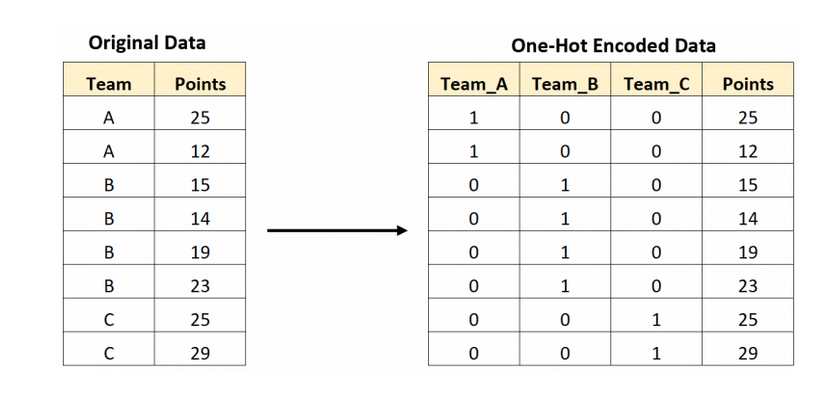

In [532]:
#do one-hot coding
job_type = pd.get_dummies(hr.sales, prefix='job')
salary_level = pd.get_dummies(hr.salary, prefix='salary')
job_type


,job_IT,job_RandD,job_accounting,job_hr,job_management,job_marketing,job_product_mng,job_sales,job_support,job_technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
14994,0,0,0,0,0,0,0,0,1,0
14995,0,0,0,0,0,0,0,0,1,0
14996,0,0,0,0,0,0,0,0,1,0
14997,0,0,0,0,0,0,0,0,1,0


In [533]:
job_type.sum()

job_IT             1227
job_RandD           787
job_accounting      767
job_hr              739
job_management      630
job_marketing       858
job_product_mng     902
job_sales          4140
job_support        2229
job_technical      2720
dtype: int64

In [534]:
#create outcome vector and features dataframe
left = hr[['left']]
left = left['left'].ravel()
X = hr.drop(['left'], axis=1)

In [535]:
hr.sample(n=10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
4287,0.56,0.66,5,155,2,0,0,0,sales,medium
3417,0.71,0.69,2,172,3,0,0,0,technical,medium
11163,0.77,0.75,4,191,3,0,0,0,IT,medium
2417,0.48,0.49,4,242,2,1,0,0,support,medium
3010,0.62,0.89,3,153,3,1,0,0,hr,low
13712,0.82,0.79,3,176,3,0,0,0,technical,low
13238,0.57,0.72,4,214,2,1,0,0,sales,low
2496,0.58,0.69,3,146,4,0,0,0,support,low
12418,0.42,0.53,3,199,4,0,1,0,technical,medium
14395,0.36,0.55,2,141,3,0,1,0,hr,medium


In [536]:
#merge with X
job_type.reset_index(inplace=True)
salary_level.reset_index(inplace=True)
X.reset_index(inplace=True)
X = pd.concat([X, job_type, salary_level], axis=1)
X.columns

Index(['index', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'sales', 'salary', 'index', 'job_IT',
       'job_RandD', 'job_accounting', 'job_hr', 'job_management',
       'job_marketing', 'job_product_mng', 'job_sales', 'job_support',
       'job_technical', 'index', 'salary_high', 'salary_low', 'salary_medium'],
      dtype='object')

In [537]:
#drop columns we do not need
X = X.drop([
    'index',
    'sales', 
    'salary',
    'last_evaluation',
    'number_project',
    'average_montly_hours',
    'job_management',
    'promotion_last_5years',
    'job_RandD',
    'Work_accident',
    'salary_medium',
    'salary_high'
], axis=1)

<div style="font-size: 14pt;">Exercise 1</div>
Answer question Q1: Who and why is leaving the company?

In [538]:
#check for multicollinearity
#use the graphic parameters below to get a well-sized heatmap
plt.rcParams["figure.figsize"] = (15,15)
plt.rcParams.update({'font.size': 22})

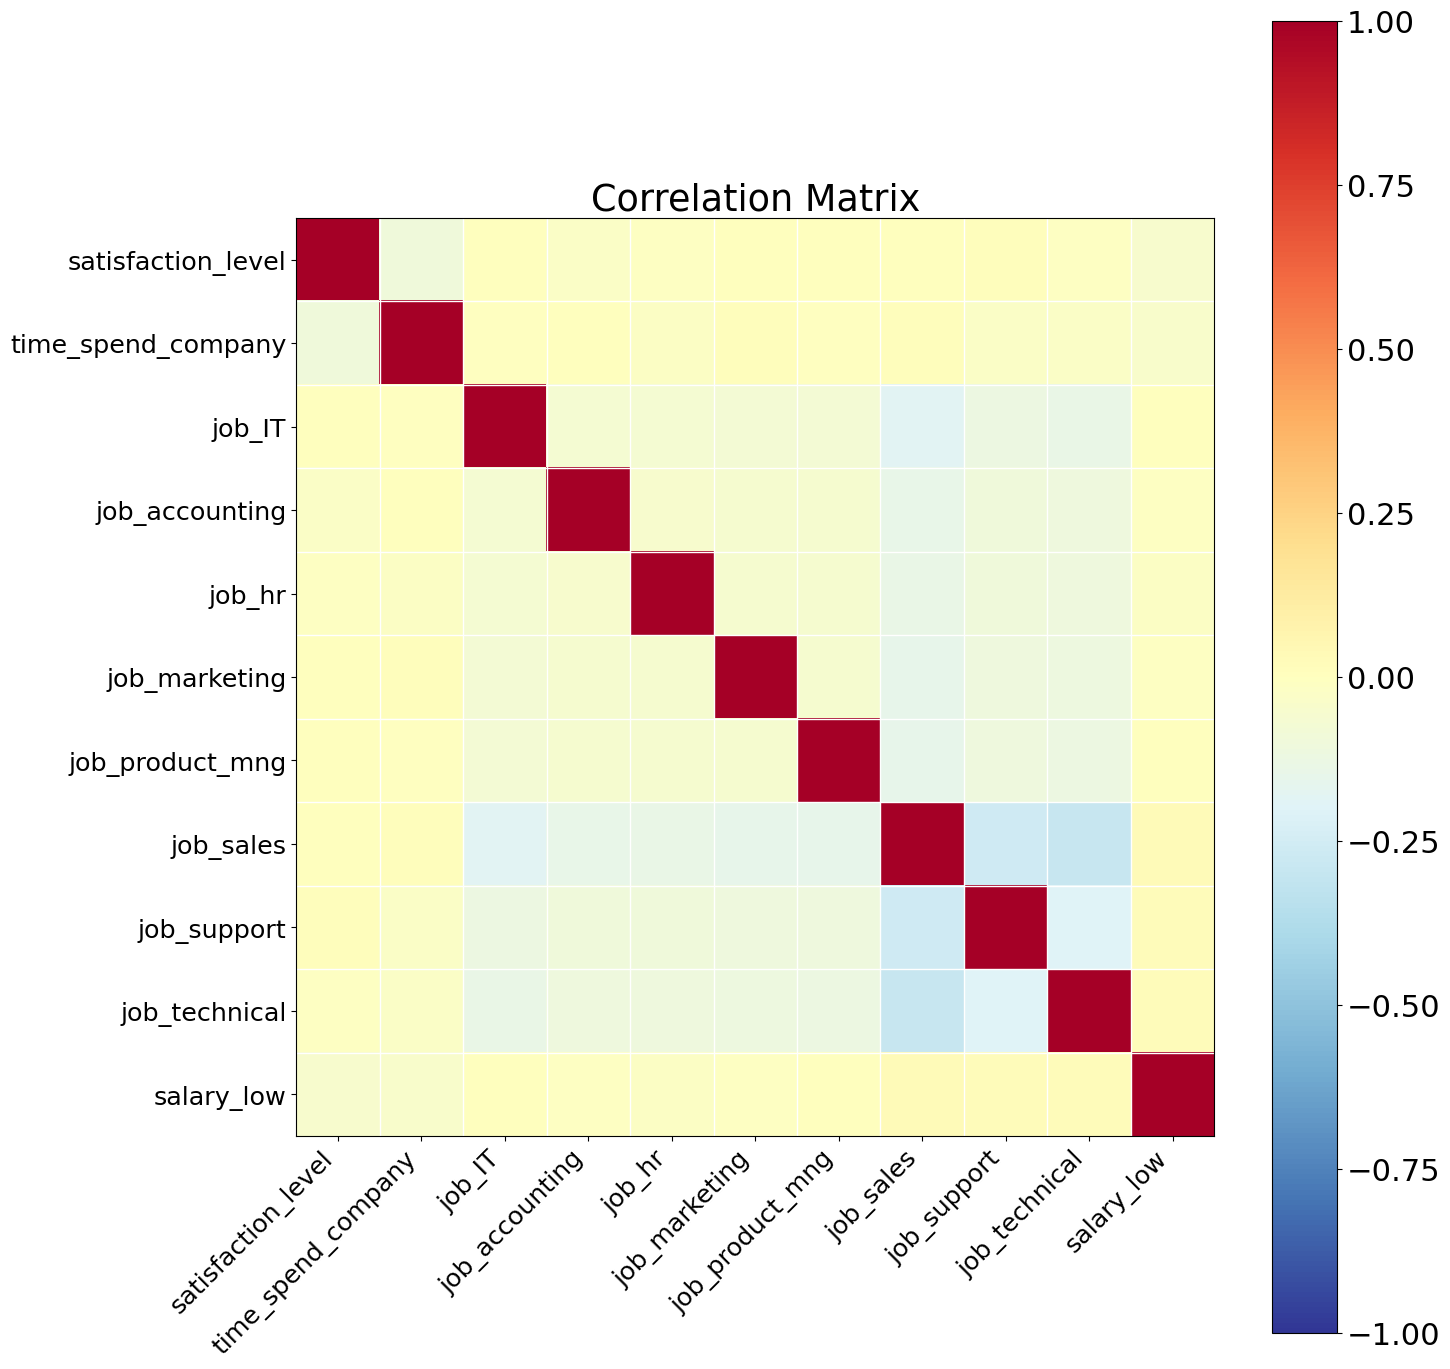

In [539]:
##add code here
corr = X.corr()
smg.plot_corr(corr,xnames=corr.columns.values ,normcolor=True)
plt.show()

In [540]:
#estimate economist style model using statsmodels library sm
#estimate the model using robust standard errors
#answer the Q1 question

In [541]:
X1 = sm.add_constant(X)
#add code here
model_ = sm.Logit(left,X1)
result_ro = model_.fit(method="newton", cov_type="hc0")
result_ro.summary()

Optimization terminated successfully.
         Current function value: 0.456113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                14999
Model:                          Logit   Df Residuals:                    14987
Method:                           MLE   Df Model:                           11
Date:                Sat, 18 Mar 2023   Pseudo R-squ.:                  0.1690
Time:                        11:54:35   Log-Likelihood:                -6841.2
converged:                       True   LL-Null:                       -8232.3
Covariance Type:                  hc0   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.8345      0.123     -6.775      0.000      -1.076      -0.593
satisfaction_level    -3.7175      0.092    -40.301      0.000      -3.898      -3.537
time_spend_company     0.2087      0.015     14.106      0.000       0.180       0.238
job_IT                 0.5481      0.113      4.869      0.000       0.327       0.769
job_accounting         0.7006      0.125      5.626      0.000       0.457       0.945
job_hr                 0.9790      0.124      7.904      0.000       0.736       1.222
job_marketing          0.6421      0.125      5.157      0.000       0.398       0.886
job_product_mng        0.5530      0.125      4.427      0.000       0.308       0.798
job_sales              0.6644      0.093      7.109      0.000       0.481       0.848
job_support            0.7304      0.101      7.260      0.000       0.533       0.928
job_technical          0.7446      0.099      7.558      0.000       0.552       0.938
salary_low             0.6746      0.044     15.257      0.000       0.588       0.761
======================================================================================
"""

In [542]:
result_ro = model_.fit(method='newton', cov_type="HC0")
result_ro.summary()

Optimization terminated successfully.
         Current function value: 0.456113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                14999
Model:                          Logit   Df Residuals:                    14987
Method:                           MLE   Df Model:                           11
Date:                Sat, 18 Mar 2023   Pseudo R-squ.:                  0.1690
Time:                        11:54:36   Log-Likelihood:                -6841.2
converged:                       True   LL-Null:                       -8232.3
Covariance Type:                  HC0   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.8345      0.123     -6.775      0.000      -1.076      -0.593
satisfaction_level    -3.7175      0.092    -40.301      0.000      -3.898      -3.537
time_spend_company     0.2087      0.015     14.106      0.000       0.180       0.238
job_IT                 0.5481      0.113      4.869      0.000       0.327       0.769
job_accounting         0.7006      0.125      5.626      0.000       0.457       0.945
job_hr                 0.9790      0.124      7.904      0.000       0.736       1.222
job_marketing          0.6421      0.125      5.157      0.000       0.398       0.886
job_product_mng        0.5530      0.125      4.427      0.000       0.308       0.798
job_sales              0.6644      0.093      7.109      0.000       0.481       0.848
job_support            0.7304      0.101      7.260      0.000       0.533       0.928
job_technical          0.7446      0.099      7.558      0.000       0.552       0.938
salary_low             0.6746      0.044     15.257      0.000       0.588       0.761
======================================================================================
"""

<div style="font-size: 14pt;">Exercise 2</div>
Answer question Q2: What is the optimal threshold?

In [543]:
#create train and test set with parameters:
#test_size = 0.2, random_state = 111

In [544]:
#add code here
x_train,x_test,y_train,y_test = train_test_split(X,left,test_size = 0.2,random_state = 111,stratify=left)

In [545]:
#check outcome variable distribution, comment on the base model accuracy

In [546]:
#add code here
y_train.mean(),y_test.mean()

(0.2381031752646054, 0.238)

In [547]:
#define and train the logistic regression model, 
#set random_state = 100, solver = 'liblinear')

In [548]:
##add code here
model =LogisticRegression(random_state=100,solver='liblinear')
model.fit(x_train,y_train)

LogisticRegression(random_state=100, solver='liblinear')

In [549]:
#make predictions and calculate confusion matrix, compare to base model
plt.rcParams["figure.figsize"] = (5,5)

<AxesSubplot:xlabel='predict', ylabel='actual'>

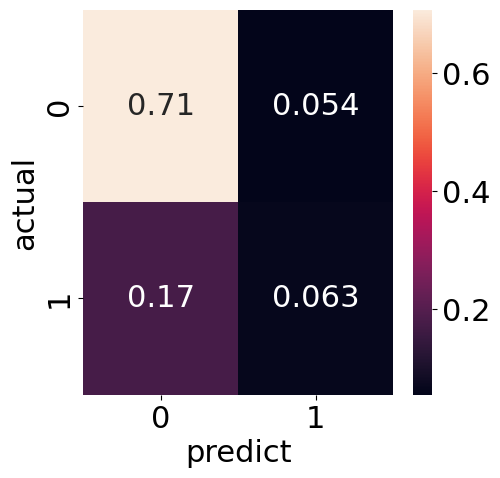

In [550]:
##add code here
y_predicted = model.predict(x_test)
cfm = pd.crosstab(y_test,y_predicted, rownames=['actual'], colnames= ['predict'])
cfm = cfm / cfm.sum().sum()
sns.heatmap(cfm,annot=True)

In [551]:
cfm.iloc[0,0] + cfm.iloc[1,1]

0.7713333333333333

In [552]:
#calculate the ROC curve


In [553]:
str_thr

['1.81',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '0.69',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '0.59',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '0.53',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '0.46',
 '.',
 '.',
 '.',
 

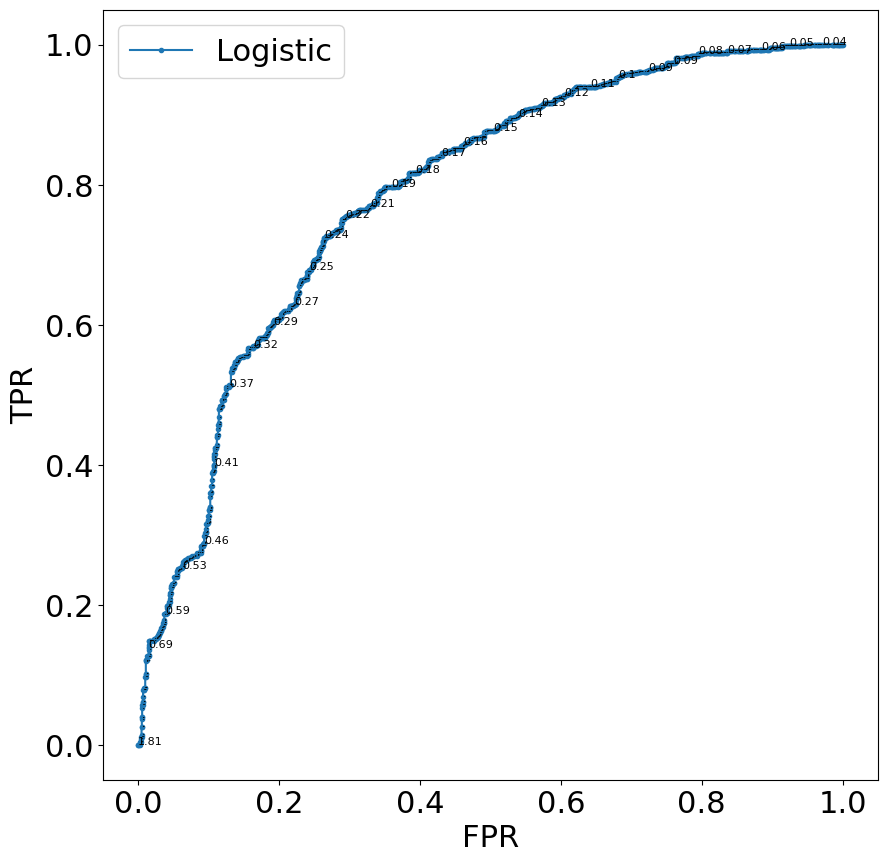

In [554]:
##add code here
y_prob = model.predict_proba(x_test)
y_prob = y_prob[:,1]
fpr , tpr , thr = roc_curve(y_test,y_prob)

str_thr = [str(round(x,2)) for x in thr]
indexes = list(range(len(str_thr)))
for i in indexes:
    if(i % 40 != 0):
        str_thr[i] = "."
plt.rcParams["figure.figsize"] = (10,10)
plt.plot(fpr,tpr,marker=".", label="Logistic")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
for i in range(len(str_thr)):
    plt.text(fpr[i],tpr[i],str_thr[i],fontsize=8)
plt.show()

In [555]:
#plot the  ROC curve using the code below

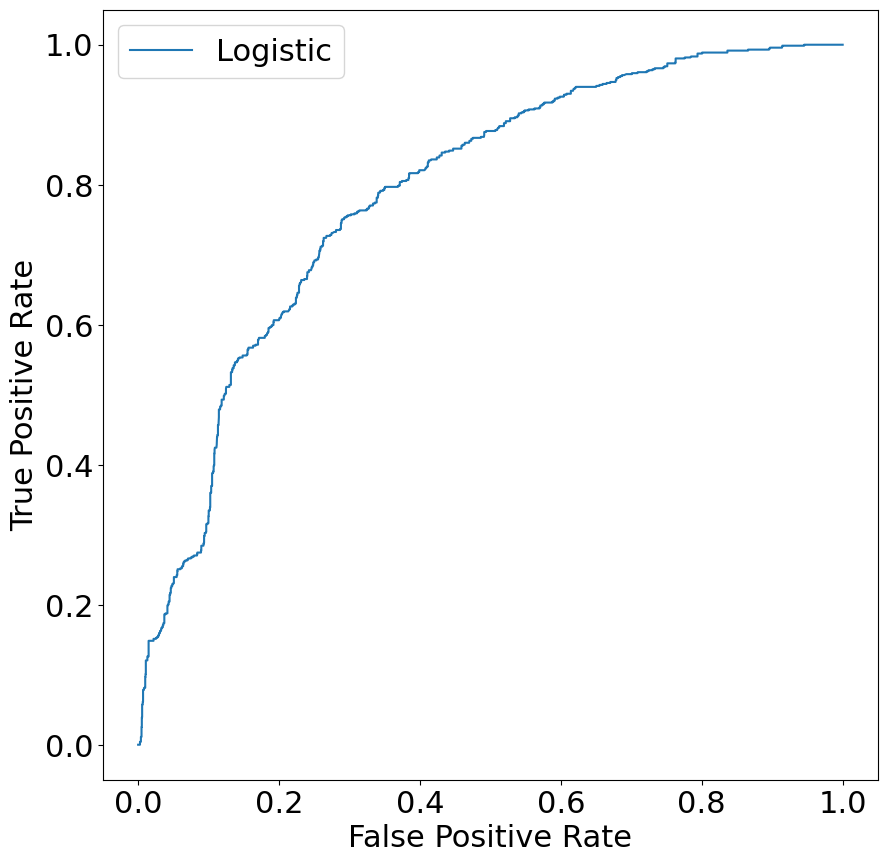

0.7870930962061116

In [556]:
plt.plot(fpr, tpr, label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
plt.show()
roc_auc_score(y_test, y_prob)

In [557]:
#experiment with the function below to find the optimal threshold

In [558]:
def calculate_confusion_matrix(y_test, y_prob, threshold):
    y_pred_t = 1*(y_prob >= threshold)
    cfm = pd.crosstab(y_test, y_pred_t, rownames=['Actual'], colnames=['Predicted'])
    cfm = cfm / cfm.sum().sum()
    sns.heatmap(cfm,annot=True)
    accuracy = cfm.iloc[0,0] + cfm.iloc[1,1]
    print("`Accuracy =  {:6.4f}".format(accuracy))
    return cfm, accuracy

`Accuracy =  0.7873


(Predicted         0         1
 Actual                       
 0          0.670000  0.092000
 1          0.120667  0.117333,
 0.7873333333333333)

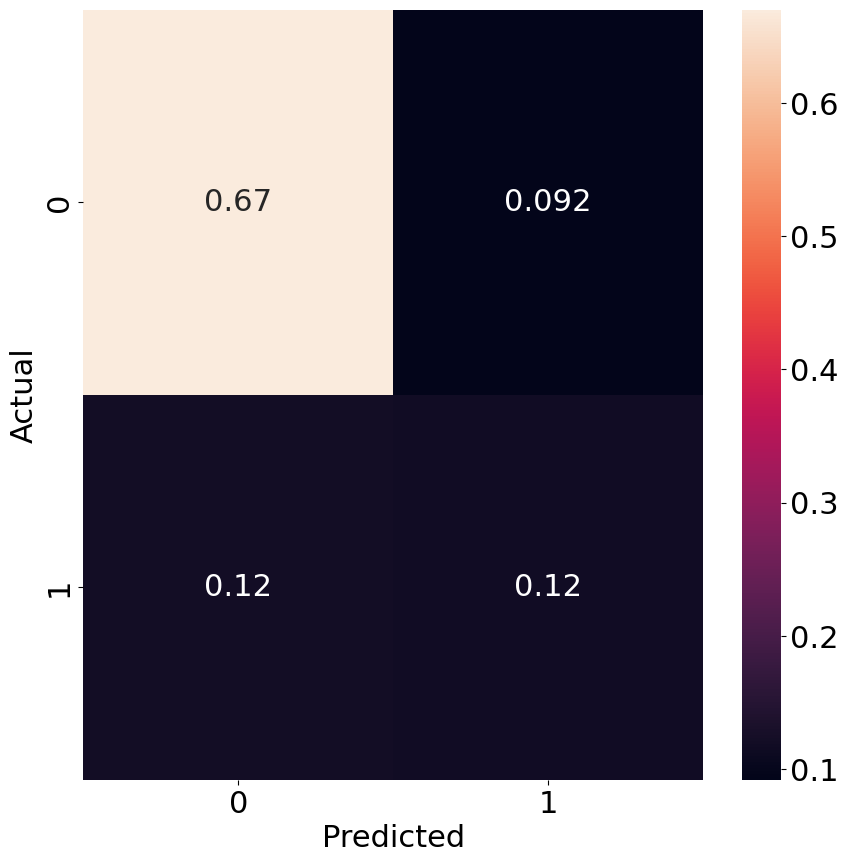

In [561]:
##add code here
calculate_confusion_matrix(y_test,y_prob,0.38)